in  convert_sen2_product_to_rgb_tensor min threshold = 0
in  replace_outliers min threshold = 0
in  replace_outliers min threshold = 0
in  replace_outliers min threshold = 0
in  convert_sen2_product_to_rgb_tensor min threshold = 50
in  replace_outliers min threshold = 50
min value before clipping is 1.0
min value after clipping is 50.0
in  replace_outliers min threshold = 50
min value before clipping is 1.0
min value after clipping is 50.0
in  replace_outliers min threshold = 50
min value before clipping is 1.0
min value after clipping is 50.0
in  convert_sen2_product_to_rgb_tensor min threshold = 92
in  replace_outliers min threshold = 92
min value before clipping is 1.0
min value after clipping is 92.0
in  replace_outliers min threshold = 92
min value before clipping is 1.0
min value after clipping is 92.0
in  replace_outliers min threshold = 92
min value before clipping is 1.0
min value after clipping is 92.0
in  convert_sen2_product_to_rgb_tensor min threshold = 116
in  replace_out

'\nfor key in thresholds:\n    rescaling_layer = Rescaling(scale = 1./thresholds[key])\n    for cur_method in methods:\n        print("currently using " + key + " as threshold and method " + cur_method)\n        \n        # load images with extreme high values\n        cur_img_type_counter = 1\n        for cur_image in files_with_highest_values:\n            sen2 = convert_sen2_product_to_rgb_tensor(DATASET_ROOT_PATH + cur_image, thresholds[key], cur_method)\n            sen2 = tf.reshape(sen2, [256, 256, 3])\n            sen2 = rescaling_layer(sen2)\n            plt.figure(img_counter)\n            plt.title("extreme high values image " + str(cur_img_type_counter) + " processing method: " + cur_method + " threshold: " + key)\n            plt.imshow(sen2)\n            plt.savefig(\'../preprocessing_sample_images/v4extreme_val_img_\' + str(cur_img_type_counter) + "_" + key + "_" + cur_method + ".jpg")\n            #axs[img_counter].set_title("extreme high values image " + str(cur_img_ty

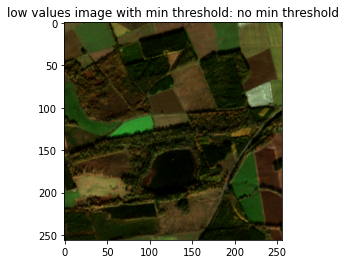

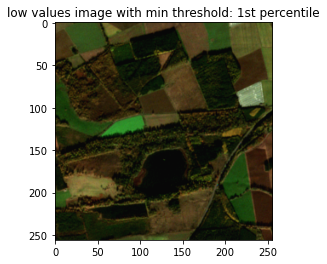

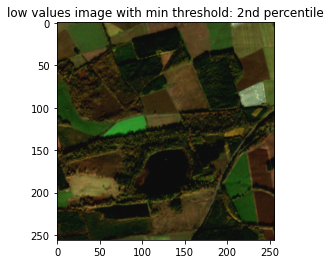

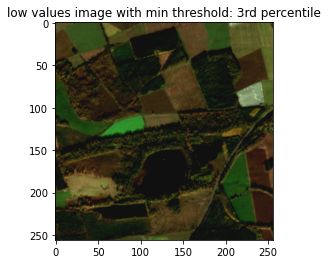

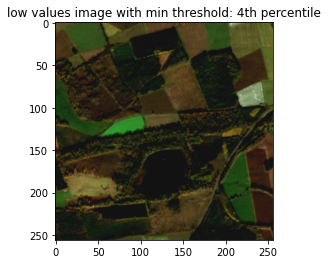

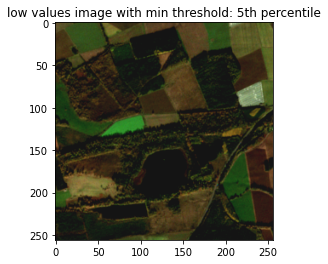

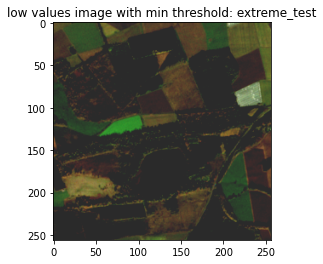

In [4]:
%reload_ext autoreload
%autoreload 2

from helpers import *
import matplotlib.pyplot as plt
import pprint
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


DATASET_ROOT_PATH = '../../data/HiltonOfFern_crop_field_training_cloud_free_available_area/'


thresholds = { '90th percentile': 913.0, '95th percentile': 1100.00, 'average plus double standard deviation': 1161.877,'98th percentile': 1348.0, 'average plus triple standard deviation': 1486.8, 'average plus quadruple standard deviation': 1811.6}
methods = [ 'clip', 'ffill', 'mean']

low_thresholds = {'no min threshold': 0, '1st percentile' : 50, '2nd percentile': 92, '3rd percentile': 116, '4th percentile': 132, '5th percentile': 145, 'extreme_test': 300}
files_with_highest_values = [
    '/20190826/ROI1/S2/Patches/S1_17e20263-31a9-4625-863f-72a5c0d29dde_S2_f764bcb1-a983-4731-afeb-42fe613ac75e_2048_1536_256x256.tif',
#    '/20190513/ROI1/S2/Patches/S1_e316e53f-5e52-486c-a5d5-e82e63d0c3bc_S2_780cee33-2b59-4171-8f6b-be8f221fbfca_1792_512_256x256.tif',
#    '/20180827/ROI1/S2/Patches/S1_f78df197-5814-44ea-bfff-351e5e1ddb50_S2_722cd3b3-d490-4d4d-8de5-891e19d25d95_2048_1536_256x256.tif',
#    '/20180827/ROI1/S2/Patches/S1_f78df197-5814-44ea-bfff-351e5e1ddb50_S2_722cd3b3-d490-4d4d-8de5-891e19d25d95_256_2560_256x256.tif',
#    '/20190225/ROI1/S2/Patches/S1_150c763c-0ee6-4611-a6ce-d9cc89f3420b_S2_d5bb8ed3-4ad7-4373-afd0-cfbfb5523da7_2048_3072_256x256.tif'
]

files_with_most_high_values = [
    '/20190826/ROI1/S2/Patches/S1_17e20263-31a9-4625-863f-72a5c0d29dde_S2_f764bcb1-a983-4731-afeb-42fe613ac75e_1536_768_256x256.tif',
    '/20190826/ROI1/S2/Patches/S1_17e20263-31a9-4625-863f-72a5c0d29dde_S2_f764bcb1-a983-4731-afeb-42fe613ac75e_2560_768_256x256.tif',
#    '/20181008/ROI1/S2/Patches/S1_c003e1d5-2306-47b5-9497-659a90562f2d_S2_46edee3a-9f5d-4912-8e55-d9b684f1166b_768_1536_256x256.tif',
#    '/20190826/ROI1/S2/Patches/S1_17e20263-31a9-4625-863f-72a5c0d29dde_S2_f764bcb1-a983-4731-afeb-42fe613ac75e_2816_2048_256x256.tif',
#    '/20180910/ROI1/S2/Patches/S1_af77da2e-fcc7-4c9f-9d70-4fc1a06c0ffc_S2_153d0c59-4118-4a16-b459-a2432b57b575_256_2560_256x256.tif'
]

files_with_high_avg = [
    '/20180917/ROI1/S2/Patches/S1_f857fae6-c9c8-42a7-93bb-b904471f754b_S2_cb651e05-5dc3-450a-b1f3-a21a987f5732_512_2816_256x256.tif',
#    '/20180910/ROI1/S2/Patches/S1_af77da2e-fcc7-4c9f-9d70-4fc1a06c0ffc_S2_153d0c59-4118-4a16-b459-a2432b57b575_2304_1024_256x256.tif',
#    '/20180917/ROI1/S2/Patches/S1_f857fae6-c9c8-42a7-93bb-b904471f754b_S2_cb651e05-5dc3-450a-b1f3-a21a987f5732_2048_2304_256x256.tif',
#    '/20180910/ROI1/S2/Patches/S1_af77da2e-fcc7-4c9f-9d70-4fc1a06c0ffc_S2_153d0c59-4118-4a16-b459-a2432b57b575_3328_256_256x256.tif',
#    '/20190916/ROI1/S2/Patches/S1_15925802-8fcf-4b63-8974-94667cd47298_S2_c788847c-df71-4ef9-900c-6abfe266815e_4608_1792_256x256.tif'
]
files_with_low_avg = [
 #   '/20181029/ROI2/S2/Patches/S1_992a54fd-c4ef-4f33-ab51-79efd8f7f63a_S2_36ac7212-ead8-4abf-854a-b1043365e7d0_1024_2304_256x256.tif',
 #   '/20181029/ROI2/S2/Patches/S1_992a54fd-c4ef-4f33-ab51-79efd8f7f63a_S2_36ac7212-ead8-4abf-854a-b1043365e7d0_2560_3072_256x256.tif',
 #   '/20181029/ROI2/S2/Patches/S1_992a54fd-c4ef-4f33-ab51-79efd8f7f63a_S2_36ac7212-ead8-4abf-854a-b1043365e7d0_2304_1280_256x256.tif',
    '/20181029/ROI2/S2/Patches/S1_992a54fd-c4ef-4f33-ab51-79efd8f7f63a_S2_36ac7212-ead8-4abf-854a-b1043365e7d0_2816_1792_256x256.tif',
 #   '/20181015/ROI1/S2/Patches/S1_531e42bd-eadb-495e-ae77-e3242f5ed70e_S2_4d4ec32a-afff-40a3-b8a3-f0a23320a93c_2560_2304_256x256.tif'
]

first_five_files = [
#    '20180827/ROI1/S2/Patches/S1_f78df197-5814-44ea-bfff-351e5e1ddb50_S2_722cd3b3-d490-4d4d-8de5-891e19d25d95_0_2048_256x256.tif',
#    '20180827/ROI1/S2/Patches/S1_f78df197-5814-44ea-bfff-351e5e1ddb50_S2_722cd3b3-d490-4d4d-8de5-891e19d25d95_0_2304_256x256.tif',
    '20180827/ROI1/S2/Patches/S1_f78df197-5814-44ea-bfff-351e5e1ddb50_S2_722cd3b3-d490-4d4d-8de5-891e19d25d95_0_3072_256x256.tif',
#    '20180827/ROI1/S2/Patches/S1_f78df197-5814-44ea-bfff-351e5e1ddb50_S2_722cd3b3-d490-4d4d-8de5-891e19d25d95_0_2560_256x256.tif',
    '20180827/ROI1/S2/Patches/S1_f78df197-5814-44ea-bfff-351e5e1ddb50_S2_722cd3b3-d490-4d4d-8de5-891e19d25d95_0_2816_256x256.tif'
]
pp = pprint.PrettyPrinter(indent=4)

img_counter = 0


for key in low_thresholds:
    rescaling_layer = Rescaling(scale = 1./1811.6)
    sen2 = convert_sen2_product_to_rgb_tensor(DATASET_ROOT_PATH + '/20181029/ROI2/S2/Patches/S1_992a54fd-c4ef-4f33-ab51-79efd8f7f63a_S2_36ac7212-ead8-4abf-854a-b1043365e7d0_2816_1792_256x256.tif',1811.6 , 'clip', low_thresholds[key])
    sen2 = tf.reshape(sen2, [256, 256, 3])
    sen2 = rescaling_layer(sen2)
    plt.figure(img_counter)
    plt.title("low values image with min threshold: "  + key)
    plt.imshow(sen2)
    plt.savefig('../preprocessing_sample_images/v4low_val_img_min_threshold_' + key + ".jpg")
    img_counter += 1

for key in thresholds:
    rescaling_layer = Rescaling(scale = 1./thresholds[key])
    for cur_method in methods:
        print("currently using " + key + " as threshold and method " + cur_method)
        
        # load images with extreme high values
        cur_img_type_counter = 1
        for cur_image in files_with_highest_values:
            sen2 = convert_sen2_product_to_rgb_tensor(DATASET_ROOT_PATH + cur_image, thresholds[key], cur_method)
            sen2 = tf.reshape(sen2, [256, 256, 3])
            sen2 = rescaling_layer(sen2)
            plt.figure(img_counter)
            plt.title("extreme high values image " + str(cur_img_type_counter) + " processing method: " + cur_method + " threshold: " + key)
            plt.imshow(sen2)
            plt.savefig('../preprocessing_sample_images/v4extreme_val_img_' + str(cur_img_type_counter) + "_" + key + "_" + cur_method + ".jpg")
            #axs[img_counter].set_title("extreme high values image " + str(cur_img_type_counter) + " processing method: " + cur_method + " threshold: " + key)
            #axs[img_counter].imshow(sen2)
            #axs[img_counter].figure.savefig('../preprocessing_sample_images/v3extreme_val_img_' + str(cur_img_type_counter) + "_" + key + "_" + cur_method + ".jpg")
            img_counter = img_counter + 1
            cur_img_type_counter = cur_img_type_counter + 1
        
        # load images with most high values
        cur_img_type_counter = 1
        for cur_image in files_with_most_high_values:
            sen2 = convert_sen2_product_to_rgb_tensor(DATASET_ROOT_PATH + cur_image, thresholds[key], cur_method)
            sen2 = tf.reshape(sen2, [256, 256, 3])
            sen2 = rescaling_layer(sen2)
            plt.figure(img_counter)
            plt.title("image with most high values " + str(cur_img_type_counter) + " processing method: " + cur_method + " threshold: " + key)
            plt.imshow(sen2)
            plt.savefig('../preprocessing_sample_images/v4most_high_val_img_' + str(cur_img_type_counter) + "_" + key + "_" + cur_method + ".jpg")
            #axs[img_counter].set_title("image with most high values " + str(cur_img_type_counter) + " processing method: " + cur_method + " threshold: " + key)
            #axs[img_counter].imshow(sen2)
            #axs[img_counter].figure.savefig('../preprocessing_sample_images/v2most_high_val_img_' + str(cur_img_type_counter) + "_" + key + "_" + cur_method + ".jpg")
            img_counter = img_counter + 1
            cur_img_type_counter = cur_img_type_counter + 1
            
        # load images with high average values
        cur_img_type_counter = 1
        for cur_image in files_with_high_avg:
            sen2 = convert_sen2_product_to_rgb_tensor(DATASET_ROOT_PATH + cur_image, thresholds[key], cur_method)
            sen2 = tf.reshape(sen2, [256, 256, 3])
            sen2 = rescaling_layer(sen2)
            plt.figure(img_counter)
            plt.title("high average values image " + str(cur_img_type_counter) + " processing method: " + cur_method + " threshold: " + key)
            plt.imshow(sen2)
            plt.savefig('../preprocessing_sample_images/v4high_avg_val_img_' + str(cur_img_type_counter) + "_" + key + "_" + cur_method + ".jpg")
    
            img_counter = img_counter + 1
            cur_img_type_counter = cur_img_type_counter + 1
        
        
        # load images with low average values
        cur_img_type_counter = 1
        for cur_image in files_with_low_avg:
            sen2 = convert_sen2_product_to_rgb_tensor(DATASET_ROOT_PATH + cur_image, thresholds[key], cur_method)
            sen2 = tf.reshape(sen2, [256, 256, 3])
            print("values before rescaling")
            pp.pprint(sen2)
            sen2 = rescaling_layer(sen2)
            print("values after scaling")
            pp.pprint(sen2)
            plt.figure(img_counter)
            plt.title("low average values image " + str(cur_img_type_counter) + " processing method: " + cur_method + " threshold: " + key)
            plt.imshow(sen2)
            plt.savefig('../preprocessing_sample_images/v4low_avg_val_img_' + str(cur_img_type_counter) + "_" + key + "_" + cur_method + ".jpg")
    
            img_counter = img_counter + 1
            cur_img_type_counter = cur_img_type_counter + 1
       
        # load first 5 images to test non extreme images
        cur_img_type_counter = 1
        for cur_image in first_five_files:
            sen2 = convert_sen2_product_to_rgb_tensor(DATASET_ROOT_PATH + cur_image, thresholds[key], cur_method)
            sen2 = tf.reshape(sen2, [256, 256, 3])
            sen2 = rescaling_layer(sen2)
            plt.figure(img_counter)
            plt.title("normal image " + str(cur_img_type_counter) + " processing method: " + cur_method + " threshold: " + key)
            plt.imshow(sen2)
            plt.savefig('../preprocessing_sample_images/v4norm_img_' + str(cur_img_type_counter) + "_" + key + "_" + cur_method + ".jpg")
    
            img_counter = img_counter + 1
            cur_img_type_counter = cur_img_type_counter + 1
